# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

**Wesley de Oliveira Mendes, 828.507**

## Tarefa 05 - Segmentação GrabCut
- Objetivo
    - Aplicar o algoritmo GrabCut para segmentação de imagens.

### Download das imagens

In [1]:
!mkdir data
!wget 'https://images.unsplash.com/photo-1547038577-da80abbc4f19?fit=crop&w=400&q=80' -O 'data/car_desert.jpg'
!wget 'https://scontent.faqa1-1.fna.fbcdn.net/v/t31.18172-8/23157300_748608245335260_5143530780480619757_o.jpg?_nc_eui2=AeHLvKBam-3PeKF7mnU1KZ6kT7bm9nnoE7RPtub2eegTtChlWXZO0R7dyxPR6mRkP1E&_nc_ohc=m2ZErC2vXdgAX9VlLlW&_nc_ht=scontent.faqa1-1.fna&oh=44f8a7d94052a5ba07612be36e43c238&oe=60D30E6C' -O 'data/picture.jpg'

--2021-05-26 02:31:20--  https://images.unsplash.com/photo-1547038577-da80abbc4f19?fit=crop&w=400&q=80
Resolving images.unsplash.com (images.unsplash.com)... 151.101.250.208, 2a04:4e42:3b::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.250.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29106 (28K) [image/jpeg]
Saving to: ‘data/car_desert.jpg’

data/car_desert.jpg 100%[===================>]  28.42K  --.-KB/s    in 0s      

2021-05-26 02:31:20 (93.6 MB/s) - ‘data/car_desert.jpg’ saved [29106/29106]

--2021-05-26 02:31:20--  https://scontent.faqa1-1.fna.fbcdn.net/v/t31.18172-8/23157300_748608245335260_5143530780480619757_o.jpg?_nc_eui2=AeHLvKBam-3PeKF7mnU1KZ6kT7bm9nnoE7RPtub2eegTtChlWXZO0R7dyxPR6mRkP1E&_nc_ohc=m2ZErC2vXdgAX9VlLlW&_nc_ht=scontent.faqa1-1.fna&oh=44f8a7d94052a5ba07612be36e43c238&oe=60D30E6C
Resolving scontent.faqa1-1.fna.fbcdn.net (scontent.faqa1-1.fna.fbcdn.net)... 201.0.223.145, 2001:12e0:803:23:face:b00c:0:a7
Connecting

### Imports

In [2]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

#### Exercício 1
Faça uma pesquisa na internet de uma imagem contendo um veículo com uma paisagem no fundo.

Você pode escolher a imagem da sua preferência.
Não esqueça que é necessário ter uma paisagem  no fundo.

Aplique o algoritmo de segmentação GrabCut para realizar a separação entre o plano de fundo (background) e o plano da frente (foreground). Demonstre os resultados obtidos.

In [3]:
exe1_img1 = cv.imread('data/car_desert.jpg')
exe1_img1 = cv.cvtColor(exe1_img1, cv.COLOR_BGR2RGB)

In [4]:
height, width = exe1_img1.shape[:2]
height, width

(308, 400)

In [5]:
exe1_img2 = exe1_img1.copy()

# tamanho do retangulo
p1 = (100, 100)
p2 = (300, 200)

exe1_img2 = cv.rectangle(exe1_img2, p1, p2, (255, 0, 0), 2)

# parametros, background, foreground
mascara = np.zeros(exe1_img1.shape[:2], np.uint8)

bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
retangulo = p1 + p2

# algoritmo GrabCut
cv.grabCut(exe1_img1, mascara, retangulo, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

# filtro dos pixels de background
filtro = np.where((mascara == 0) | (mascara == 2), 0, 1).astype('uint8')

exe1_img3 = exe1_img1.copy()
exe1_img3 = exe1_img3 * filtro[:, :, np.newaxis]

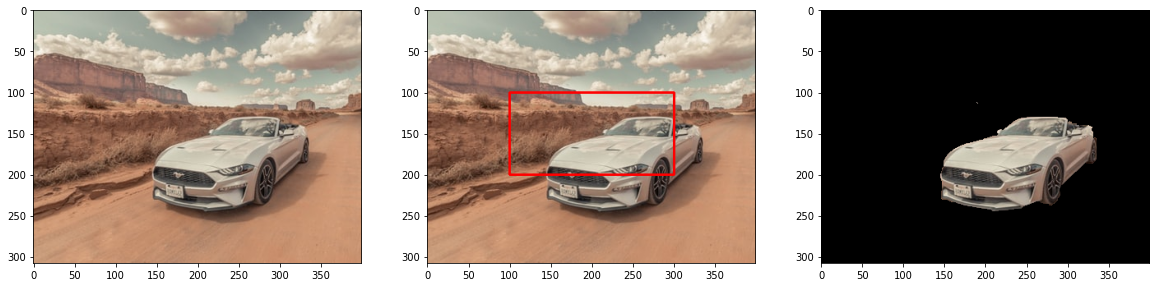

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(131), plt.imshow(exe1_img1)
plt.subplot(132), plt.imshow(exe1_img2)
plt.subplot(133), plt.imshow(exe1_img3)
plt.show()

#### Exercício 2
Escolha uma **foto** sua, ou uma **foto que contenha pessoas**, e aplique o  algoritmo de GrabCut para segmentar as pessoas contidas na foto. Demonstre os resultados obtidos.

In [7]:
exe2_img1 = cv.imread('data/picture.jpg')
exe2_img1 = cv.resize(exe2_img1, (0, 0), fx=0.5, fy=0.5)
exe2_img1 = cv.cvtColor(exe2_img1, cv.COLOR_BGR2RGB)

In [8]:
height, width = exe2_img1.shape[:2]
height, width

(682, 1024)

In [9]:
exe2_img2 = exe2_img1.copy()

# tamanho do retangulo
p1 = (160, 30)
p2 = (750, 700)

exe2_img2 = cv.rectangle(exe2_img2, p1, p2, (255, 0, 0), 2)

# parametros, background, foreground
mascara = np.zeros(exe2_img1.shape[:2], np.uint8)

bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
retangulo = p1 + p2

# algoritmo GrabCut
cv.grabCut(exe2_img1, mascara, retangulo, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

# filtro dos pixels de background
filtro = np.where((mascara == 0) | (mascara == 2), 0, 1).astype('uint8')

exe2_img3 = exe2_img1.copy()
exe2_img3 = exe2_img3 * filtro[:, :, np.newaxis]

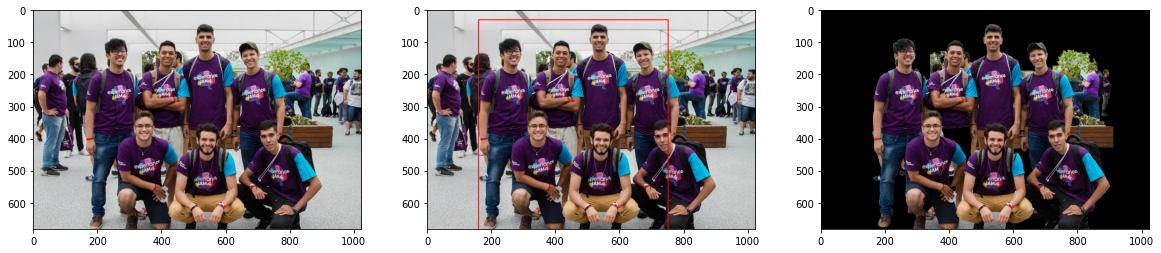

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(131), plt.imshow(exe2_img1)
plt.subplot(132), plt.imshow(exe2_img2)
plt.subplot(133), plt.imshow(exe2_img3)
plt.show()